In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
mouse_path = os.path.join("data", "mouse_drug_data.csv")
clinical_path = os.path.join("data", "clinicaltrial_data.csv")

In [3]:
mouse_drug_df = pd.read_csv(mouse_path)
clinical_trial_df = pd.read_csv(clinical_path)

In [4]:
mouse_clinical_df = pd.merge(clinical_trial_df, mouse_drug_df, left_on= "Mouse ID", right_on= "Mouse ID", how="outer")

In [5]:
mouse_clinical_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


### Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

In [7]:
mean_tumor_volume_df = mouse_clinical_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)": ["mean"]})

In [8]:
mean_tumor_volume_df.columns= ["Average Tumor Volume (mm3)"]

In [9]:
mean_tumor_volume_df.head()

Average Tumor Volume (mm3)
Drug      Timepoint                            
Capomulin 0                           45.000000
          5                           44.266086
          10                          43.084291
          15                          42.064317
          20                          40.716325

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

In [11]:
sem_tumor_volume = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

In [12]:
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume)

In [13]:
sem_tumor_volume_df.columns= ["Standard Error of Tumor Volume (mm3)"]

In [14]:
sem_tumor_volume_df.head()

Standard Error of Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                                      0.000000
          5                                      0.448593
          10                                     0.702684
          15                                     0.838617
          20                                     0.909731

In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [16]:
mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

In [17]:
mean_tumor_volume_by_drug_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Average Tumor Volume (mm3)"]

In [18]:
mean_tumor_volume_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [19]:
sem_tumor_volume_df = sem_tumor_volume_df.reset_index()

In [20]:
sem_tumor_volume_by_drug_df = sem_tumor_volume_df.pivot(index="Timepoint", columns="Drug")["Standard Error of Tumor Volume (mm3)"]

In [21]:
sem_tumor_volume_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [22]:
# Generate the Plot (with Error Bars)
# Save the Figure

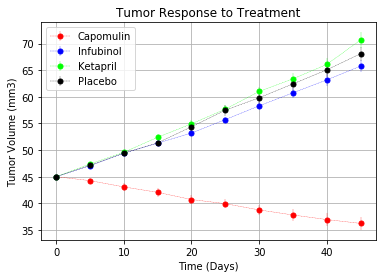

In [23]:
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Capomulin"], yerr=sem_tumor_volume_by_drug_df["Capomulin"],
            label= "Capomulin", color= "#ff0000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Infubinol"], yerr=sem_tumor_volume_by_drug_df["Infubinol"],
            label= "Infubinol", color= "#0000ff", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Ketapril"], yerr=sem_tumor_volume_by_drug_df["Ketapril"],
            label= "Ketapril", color= "#00ff00", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_tumor_volume_by_drug_df.index, mean_tumor_volume_by_drug_df["Placebo"], yerr=sem_tumor_volume_by_drug_df["Placebo"],
            label= "Placebo", color= "#000000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc= "upper left")
plt.grid()
            
plt.savefig("Tumor Response to Treatment.png")
plt.show()

plt.close()

### Metastatic Response To Treatment

In [24]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

In [25]:
mean_metastatic_df = mouse_clinical_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": ["mean"]})

In [26]:
mean_metastatic_df.columns= ["Average Metastatic Sites"]

In [27]:
mean_metastatic_df.head()

Average Metastatic Sites
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.160000
          10                         0.320000
          15                         0.375000
          20                         0.652174

In [28]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

In [29]:
sem_metastatic = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

In [30]:
sem_metastatic_df = pd.DataFrame(sem_metastatic)

In [31]:
sem_metastatic_df.columns= ["Standard Error of Metatstatic Sites"]

In [32]:
sem_metastatic_df.head()

Standard Error of Metatstatic Sites
Drug      Timepoint                                     
Capomulin 0                                     0.000000
          5                                     0.074833
          10                                    0.125433
          15                                    0.132048
          20                                    0.161621

In [33]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

In [34]:
mean_metastatic_df = mean_metastatic_df.reset_index()

In [35]:
mean_metatstatic_by_drug_df = mean_metastatic_df.pivot(index="Timepoint", columns="Drug")["Average Metastatic Sites"]

In [36]:
mean_metatstatic_by_drug_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [37]:
sem_metastatic_df = sem_metastatic_df.reset_index()

In [38]:
sem_metastatic_df = sem_metastatic_df.pivot(index="Timepoint", columns="Drug")["Standard Error of Metatstatic Sites"]

In [39]:
sem_metastatic_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [40]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

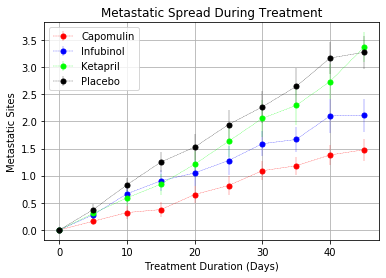

In [41]:
plt.errorbar(mean_metatstatic_by_drug_df.index, mean_metatstatic_by_drug_df["Capomulin"], yerr= sem_metastatic_df["Capomulin"],
            label= "Capomulin", color= "#ff0000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_metatstatic_by_drug_df.index, mean_metatstatic_by_drug_df["Infubinol"], yerr= sem_metastatic_df["Infubinol"],
            label= "Infubinol", color= "#0000ff", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_metatstatic_by_drug_df.index, mean_metatstatic_by_drug_df["Ketapril"], yerr= sem_metastatic_df["Ketapril"],
            label= "Ketapril", color= "#00ff00", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mean_metatstatic_by_drug_df.index, mean_metatstatic_by_drug_df["Placebo"], yerr= sem_metastatic_df["Placebo"],
            label= "Placebo", color= "#000000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc= "upper left")
plt.grid()
            
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()

plt.close()

### Survival Rates

In [42]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

In [43]:
mouse_count = mouse_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].count()

In [46]:
mouse_count_df = pd.DataFrame({"Mouse Count": mouse_count})

In [47]:
mouse_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [48]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

In [49]:
mouse_count_df = mouse_count_df.reset_index()

In [50]:
mouse_count_by_drug_df = mouse_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

In [51]:
mouse_count_by_drug_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [52]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

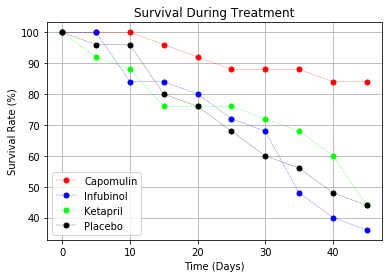

In [53]:
plt.errorbar(mouse_count_by_drug_df.index, (mouse_count_by_drug_df["Capomulin"] / 25) * 100,
            label= "Capomulin", color= "#ff0000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mouse_count_by_drug_df.index, (mouse_count_by_drug_df["Infubinol"] / 25) * 100,
            label= "Infubinol", color= "#0000ff", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mouse_count_by_drug_df.index, (mouse_count_by_drug_df["Ketapril"] / 25) * 100,
            label= "Ketapril", color= "#00ff00", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)
plt.errorbar(mouse_count_by_drug_df.index, (mouse_count_by_drug_df["Placebo"] / 25) * 100,
            label= "Placebo", color= "#000000", marker= "o", markersize= 5, linestyle= "--", linewidth= 0.3)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc= "lower left")
plt.grid()
            
plt.savefig("Survival During Treatment.png")
plt.show()

plt.close()